In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy

%cd /usr/local/lib/python3.8/dist-packages/konlpy/java

!jar xvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar

with open(f"/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 28.9 MB/s eta 0:00:00
/usr/local/lib/python3.8/dist-packages/konlpy/java
  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/proce

In [3]:
data += '여기어때\n데일리호텔\n야놀자\n인터파크투어\n마이리얼트립\n호텔스닷컴\n익스피디아\n에어비앤비\n부킹닷컴\n트리바고\n스카이스캐너\n호텔스컴파인\n아고다\n가성비\n코로나\n최저가\n본인인증\n체크인\n체크아웃\n카카오톡'

with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [4]:
!jar cvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar * 

added manifest
adding: aho-corasick.jar(in = 79138) (out= 76068)(deflated 3%)
adding: bin/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/KkmaInterface$3.class(in = 469) (out= 312)(deflated 33%)
adding: bin/kr/lucypark/kkma/KkmaInterface$2.class(in = 455) (out= 291)(deflated 36%)
adding: bin/kr/lucypark/kkma/KkmaInterface.class(in = 2762) (out= 1476)(deflated 46%)
adding: bin/kr/lucypark/kkma/KkmaInterface$4.class(in = 471) (out= 305)(deflated 35%)
adding: bin/kr/lucypark/kkma/KkmaInterface$1.class(in = 453) (out= 297)(deflated 34%)
adding: bin/kr/lucypark/jhannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/WorkflowFactory.class(in = 2931) (out= 1095)(deflated 62%)
adding: bin/kr/lucypark/jhannanum/comm/(in = 0) (out= 0)(st

In [5]:
import pandas as pd


topic_2 = pd.read_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_2.csv')

In [6]:
topic_2 = topic_2.drop(columns = ['Unnamed: 0'])

topic_2

,text
0,쿠폰 할인 혜택이 여기어 때보다 좋음
1,직장생활의 유일한 휴식은 가족과 호캉스가는 건데 데일리호텔 덕분에 많은 호텔은 저렴...
2,업데이트되고부터 내 주변만 나와서 주변 모텔 거 이 없는 지역은 선택지가 없음 전엔...
3,광고 그냥 미친 듯 고인의 뜻이고 뭐고 상업적으로 돌아가신지 얼마 안 되신 분을 가...
4,좋은 숙소 정리가 잘 되어 있네 요 리뷰에 만족함이 많아 기대됩니다
...,...
1489,예약관리나 안내 환불 규정 등 잘 돼 있고 예약한 숙소 주변으로 맛 집이나 여행지 ...
1490,저렴하게 숙소를 예약할 수 있었고 지역별로 한눈에 숙소를 알아볼 수 있어서 좋았어요...
1491,대한민국 대표 숙박 어플 쿠폰도 많고 괜찮으나 포인트 제도가 없어 아쉬운 점
1492,오랫동안 만족스러움 초창기에 부도 객실이나 당일 미 판매 객실 특가로 나오던 게 없...


In [7]:
import pickle

with open("/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/명사 추출 코퍼스 저장/stop_words.pkl","rb") as f:
    stop_words = pickle.load(f)

In [8]:
!pip install gensim
!pip install wget

import gensim
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt
import re
from tqdm import tqdm
import time

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':
          if len(word) > 1:
            if word not in stop_words:
              words.append(word)            
    return words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=5f1fe156e92a23c6ec42fd620d2bdf599f7eee585e5508b035200597442d5edb
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [9]:
topic_2.shape

(1494, 1)

In [10]:
tokenized_list = []

for text in tqdm(topic_2['text'][:1530]):                 # 숫자 수정
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

100%|██████████| 1494/1494 [00:41<00:00, 36.01it/s] 

1494
['쿠폰', '할인', '혜택']


In [11]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   
        topic_2.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

topic_2.reset_index(drop=True, inplace=True)

In [12]:
bigram = Phrases(tokenized_list, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
 
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

In [13]:
import wget
url = 'http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip'
wget.download(url)

!unzip mallet-2.0.8.zip

import os
from gensim.models.wrappers import LdaMallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/usr/local/lib/python3.8/dist-packages/konlpy/java/mallet-2.0.8/bin/mallet'

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [14]:
import gensim
import gensim.corpora as corpora
from gensim import corpora
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

id2word=corpora.Dictionary(words_bigram)
id2word.filter_extremes(no_below = 10 ) #5회 이하로 등장한 단어는 삭제
texts = words_bigram
corpus=[id2word.doc2bow(text) for text in texts] ## BoW 생성 ##

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step=1):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=words_bigram, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

Num Topics = 2  has Coherence Value of 0.2947444484761127
Num Topics = 3  has Coherence Value of 0.32263059424831747
Num Topics = 4  has Coherence Value of 0.39199104169322946


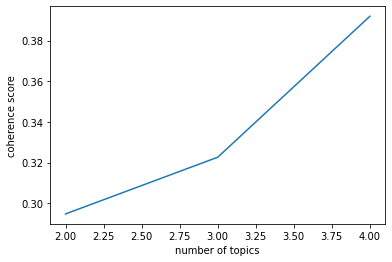

In [44]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigram, start=2, limit=5, step=1)

limit=5; start=2; step=1;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv,)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1
# 높은값이 최적~!~!

plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
                
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fro

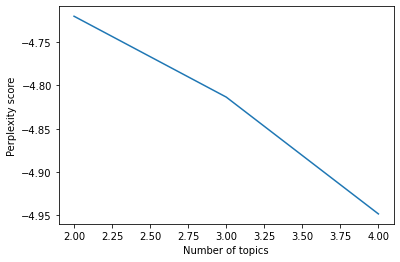

In [45]:
perplexity_values = []
for i in range(2,5): # 2~8 하이퍼 파라미터를 변경하면서 점수 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = id2word)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

x = range(2,5)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [46]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [47]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(gensim_model, corpus, id2word)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.001000  0.000212       1        1  25.325792
1     -0.000131 -0.000791       2        1  25.079408
0      0.000386  0.000896       3        1  24.806462
2      0.000746 -0.000318       4        1  24.788338, topic_info=     Term       Freq      Total Category  logprob  loglift
58     특가  34.000000  34.000000  Default  30.0000  30.0000
65     커플  34.000000  34.000000  Default  29.0000  29.0000
17     추가  35.000000  35.000000  Default  28.0000  28.0000
59     직관  34.000000  34.000000  Default  27.0000  27.0000
112    현장  34.000000  34.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
110    도착   9.047856  34.607798   Topic4  -4.8150   0.0532
76     가능   9.222005  36.365536   Topic4  -4.7959   0.0228
12     설명   9.032319  35.630338   Topic4  -4.8167   0.0224
3    업데이트   8.902020  34.630116   Topic4  -4.8312   0.0364
94     전국   8.900757  34.644730   Topic4  -4.8313   0.0358

[179 rows x 6 columns], token_table=      Topic      Freq Term
term                      
22        1  0.248165   가격
22        2  0.275739   가격
22        3  0.248165   가격
22        4  0.248165   가격
76        1  0.219989   가능
...     ...       ...  ...
29        4  0.270798   휴가
51        1  0.256022   힐링
51        2  0.256022   힐링
51        3  0.227575   힐링
51        4  0.227575   힐링

[432 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [48]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=20)                            #이거 숫자 바꿈
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, topic_2['text']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=words_bigram)

# Format
df_topic_review = df_topic_sents_keywords.reset_index()
df_topic_review.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'text']

# Show각 문서에 대한 토픽
df_dominant_topic=df_topic_review.sort_values(by=['Dominant_Topic'])
df_dominant_topic

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,0,0.0,0.2788,"선택, 할인, 쿠폰, 추천, 가입, 할인_혜택, 포인트, 정보_제공, 출장, 여행지...",쿠폰 할인 혜택이 여기어 때보다 좋음
985,985,0.0,0.2736,"선택, 할인, 쿠폰, 추천, 가입, 할인_혜택, 포인트, 정보_제공, 출장, 여행지...",가입할 때 정보다 입력하고 동의 및 계속 번 누르는데 안됨 앱 끄고 다시 해봐도 안...
467,467,0.0,0.2685,"선택, 할인, 쿠폰, 추천, 가입, 할인_혜택, 포인트, 정보_제공, 출장, 여행지...",포인트 혜택과 많은 객실 정보 좋네요 굳
464,464,0.0,0.2736,"선택, 할인, 쿠폰, 추천, 가입, 할인_혜택, 포인트, 정보_제공, 출장, 여행지...",호캉스하려고 찾아보다가 알게 되었는데 어플도 깔끔하고 호텔에 대해 궁금할 것 같은 ...
986,986,0.0,0.2596,"선택, 할인, 쿠폰, 추천, 가입, 할인_혜택, 포인트, 정보_제공, 출장, 여행지...",빠른 결제와 폭넓은 할인 혜택이 좋아 욯ㅎ
...,...,...,...,...,...
483,483,3.0,0.2603,"객실, 시설, 정보, 주변, 결제, 취소, 환불, 수영장, 고객_센터, 휴가, 방문...",꼭 예약할 상황이 아니라 도 주변 숙소 여행 식당 등 다양한 정보를 얻을 수 있어 ...
964,964,3.0,0.2736,"객실, 시설, 정보, 주변, 결제, 취소, 환불, 수영장, 고객_센터, 휴가, 방문...",고객센터 업무처리도 바로 진행되고 숙소도 선택지가 많아서 좋아요
963,963,3.0,0.3250,"객실, 시설, 정보, 주변, 결제, 취소, 환불, 수영장, 고객_센터, 휴가, 방문...",일 전 숙소 예약을 했는데 일남 겨둔 상태에서 오버부킹이라고 연락이 왔네요 차액 조...
475,475,3.0,0.2719,"객실, 시설, 정보, 주변, 결제, 취소, 환불, 수영장, 고객_센터, 휴가, 방문...",호텔 찾기가 너무 용이하고 편해 요 주변 지인에게도 많이 추천합니다 어플 자체가 고...


In [49]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "text", "Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num", "Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'] +1
df_topic_review.Dominant_Topic = df_topic_review.Dominant_Topic.astype(str)
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'].str.split('.').str[0]

In [50]:
lda_inform.to_csv ("./lda_inform.csv", index = None, encoding="CP949")
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"선택, 할인, 쿠폰, 추천, 가입, 할인_혜택, 포인트, 정보_제공, 출장, 여행지...",443,0.3667
1.0,2,"가격, 검색, 리뷰, 도움, 비교, 이벤트, 친구, 추억, 합리, 지역, 성비, 숙...",281,0.2326
2.0,3,"사진, 정보, 설명, 광고, 후기, 보기, 찾기, 여자친구, 평가, 서비스, 한눈,...",277,0.2293
3.0,4,"객실, 시설, 정보, 주변, 결제, 취소, 환불, 수영장, 고객_센터, 휴가, 방문...",207,0.1714
